# Author :- Shriraj Gajanan Chinchwade 

### TSF GRIP Data Science and Business Analytics Task 1

### Problem statement :- Predict the percentage of an student based on the no. of study hours.

#### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [19]:
#importing dataset
data_set = "http://bit.ly/w-data"
data = pd.read_csv(data_set)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [20]:
# Check if there any null value in the Dataset
data.isnull == True

False

#### Visualizing Data
As, the task contains only two variables i.e. Hours and Scores. So, Hours (INDEPENDENT VARIABLE) will be plotted on x-axis and Scores(DEPENDENT VARIABLE) on Y-axis.

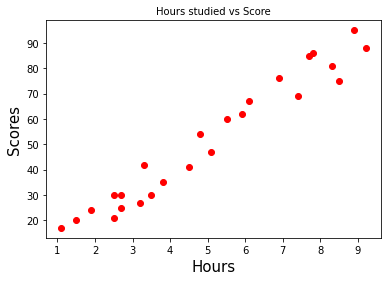

In [21]:
# Plotting the distribution of scores
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores,color='red',marker='o')
plt.show()

graph indicates positive linear relationship between Hours studied and the Scores

#### Preparing the Data

In [22]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now, we have to split the data for that we will use Scikit-Learn's built-in train_test_split() method:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

#### Training the Model

In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


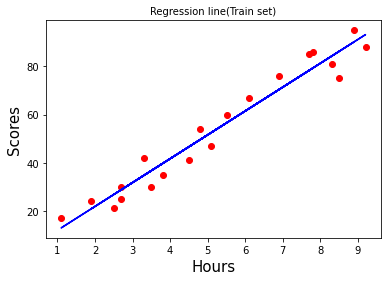

In [25]:
Y0 = regressor.intercept_ + regressor.coef_*X_train
plt.scatter(X_train,y_train,color='red',marker='o')
plt.plot(X_train,Y0,color='blue')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

#### Making Predictions

In [26]:
pred_y = regressor.predict(X)
prediction = pd.DataFrame({'Hours': [i[0] for i in X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,2.5,26.794801
1,5.1,52.562508
2,3.2,33.732261
3,8.5,86.258740
4,3.5,36.705458
5,1.5,16.884145
6,9.2,93.196200
7,5.5,56.526771
8,8.3,84.276609
9,2.7,28.776933


#### Comparing predicted marks with actual marks

In [27]:
compare_scores = pd.DataFrame({'Actual Marks': y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,21,26.794801
1,47,52.562508
2,27,33.732261
3,75,86.258740
4,30,36.705458
5,20,16.884145
6,88,93.196200
7,60,56.526771
8,81,84.276609
9,25,28.776933


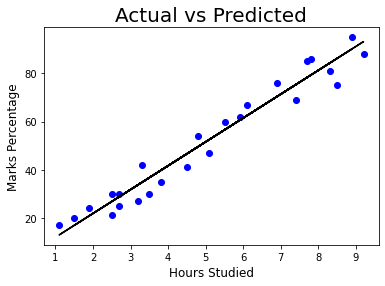

In [28]:
plt.scatter(x=X, y=y, color='blue')
plt.plot(X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### Accuracy

In [30]:
print("Accuracy Of the Model =",regressor.score(X_test,y_test))

Accuracy Of the Model = 0.9454906892105356


Accuracy is 94%.which is good model.

#### Error

In [31]:
print("Mean absolute error =",mean_absolute_error(y,pred_y))

Mean absolute error = 4.986053347144891


### predicted score if a student studies for 9.25 hrs/ day

In [32]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


## Conclusion
From the above result we can say that if a student studied for 9.25 hours then, He/She will secure 93.69 Marks.